<a href="https://colab.research.google.com/github/Ludvins/2024_PAC-Chernoff-Bound/blob/main/Figure1and4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get update
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,169 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 https://r2u.stat.ill

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision
from tqdm import tqdm
import copy
from google.colab import files
import pickle

# Set-Up



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.pyplot import figure
import scipy as sp

import matplotlib as mpl

In [4]:


def non_latex_format():
    mpl.rcParams.update(mpl.rcParamsDefault)

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    plt.rcParams['figure.figsize'] = (16, 7)
    fontsize = 30
    matplotlib.rcParams.update({'font.size': fontsize})

def latex_format():
  plt.rcParams.update({
      'font.size': 10,
      'text.usetex': True,
      'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{bm}'
  })
  mpl.rc('font',family='Times New Roman')
  matplotlib.rcParams['pdf.fonttype'] = 42
  matplotlib.rcParams['ps.fonttype'] = 42
  plt.rcParams['figure.figsize'] = (16, 9)
  fontsize = 30
  matplotlib.rcParams.update({'font.size': fontsize})




In [5]:
latex_format()

# Data

In [6]:
x = np.linspace(0, 0.5, 100)

In [7]:
model1 = lambda x: (x**2)/2
model2 = lambda x: (x**2)/1
model3 = lambda x: (x**2)/3

0.525


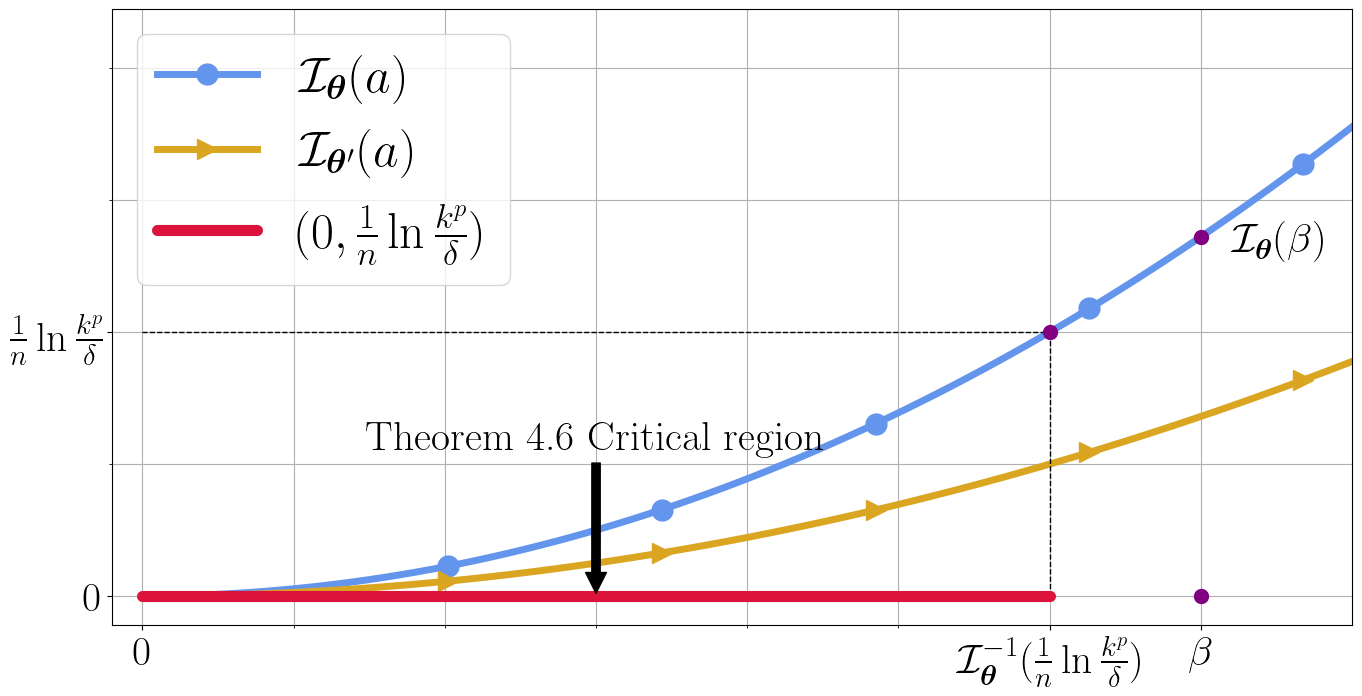

In [8]:

plt.rcParams['figure.figsize'] = (16, 8)
plt.tick_params(left = True, right = False , labelleft = True , labelbottom = True, bottom = True)
plt.grid(True, "both")

plt.plot(x, model2(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}}(a)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=(20, 14))
plt.plot(x, model1(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}'}(a)$", color = "goldenrod", marker = ">",  markersize=15, markevery=(20, 14))




slope = 0.6
pos = slope/2
lambd = pos
pos2 = 0.35

x_ = np.linspace(-0.05, 0.05, 10)


plt.plot([0,lambd], [0,0], color = "crimson", linewidth = 8, zorder = 3, label = r"$\textstyle (0, \frac{1}{n}\ln\frac{k^p}{\delta})$", solid_capstyle='round')
plt.plot([0,lambd], [model2(lambd),model2(lambd)], color = "black", linewidth = 1, linestyle = "dashed")
plt.plot([lambd,lambd], [0,model2(lambd)], color = "black", linewidth = 1, linestyle = "dashed")


plt.annotate(r"Theorem 4.6 Critical region", xy = (lambd/2,0) , xytext = (lambd/4-0.001, 0.05),
            arrowprops=dict(arrowstyle='simple', facecolor='black', relpos = (0.5, 0.5)))
plt.scatter(lambd, model2(lambd), s=100, color = "purple", zorder = 3)


plt.scatter(pos2, 0, s=100, color = "purple", zorder = 3)
plt.text(pos2+0.01, model2(pos2) - 0.005, r"$\mathcal{I}_{\bm{\theta}}(\beta)$")

plt.scatter(pos2, model2(pos2), zorder = 3, s=100, color = "purple")
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)

ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
plt.xticks([0, 0.3, pos2], [0, r"$\mathcal{I}^{-1}_{\bm{\theta}}\Big(\frac{1}{n}\ln\frac{k^p}{\delta}\Big)$", r"$\beta$"])
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25], minor = True)
plt.yticks([0, model2(lambd)], [0, r"$\frac{1}{n}\ln\frac{k^p}{\delta}$"])
plt.yticks([model2(lambd)/2, 6*model2(lambd)/4, 8*model2(lambd)/4], minor = True)


plt.legend(loc = 2, fontsize=36)
print(xlim[1])
ax.set_xlim([-0.01, 0.4])
ax.set_ylim([-0.01, 0.2])
#plt.axis('off')
plt.savefig("I_Theorem_4_5.pdf", format = "pdf",bbox_inches='tight')
#plt.show()

In [9]:
model1_inv = lambda x: (2*x)**(1/2)
model2_inv = lambda x: x**(1/2)

0.525


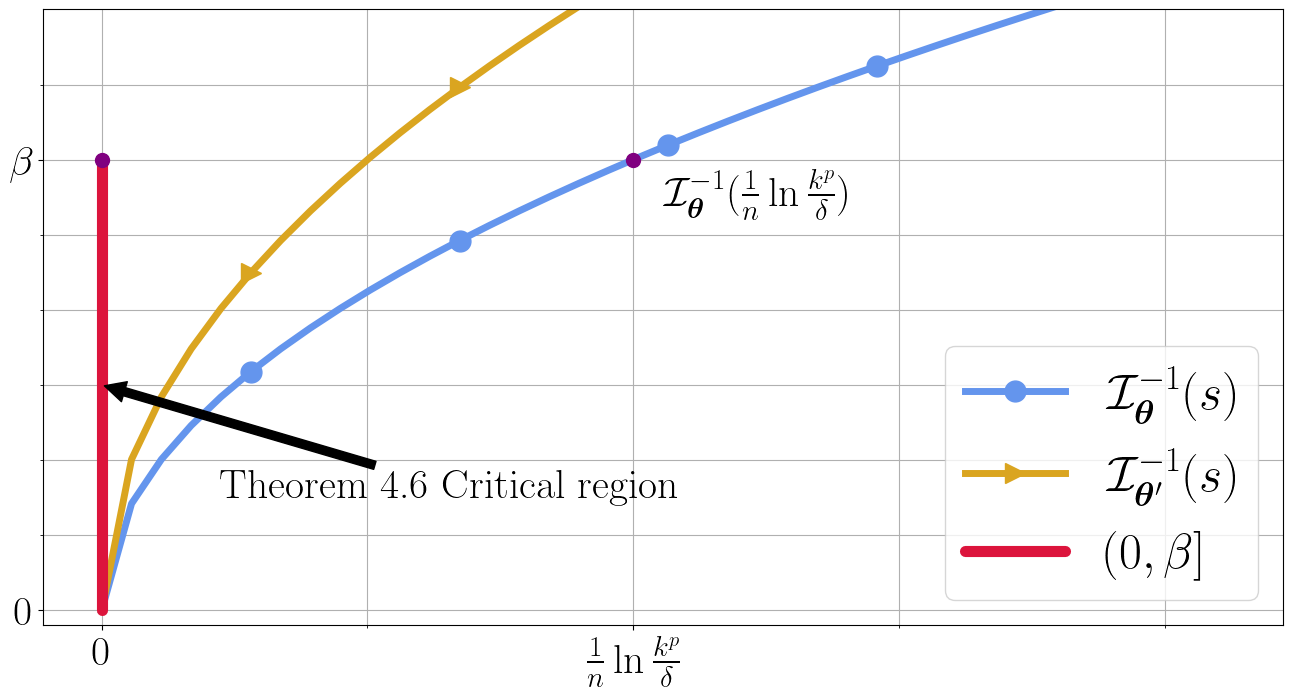

In [10]:

plt.rcParams['figure.figsize'] = (16, 8)
plt.tick_params(left = True, right = False , labelleft = True , labelbottom = True, bottom = True)
plt.grid(True, "both")

plt.plot(x, model2_inv(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}}(s)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=(5, 7))
plt.plot(x, model1_inv(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}'}(s)$", color = "goldenrod", marker = ">",  markersize=15, markevery=(5, 7))




slope = 0.6
pos = slope/2
lambd = pos

x_ = np.linspace(-0.05, 0.05, 10)


plt.plot([0,0], [0,lambd], color = "crimson", linewidth = 8, zorder = 3, label = r"$(0, \beta]$", solid_capstyle='round')


plt.annotate(r"Theorem 4.6 Critical region", xy = (0, lambd/2) , xytext = (0.02, lambd/4),
            arrowprops=dict(arrowstyle='simple', facecolor='black', relpos = (0.5, 0.5)))


plt.scatter(0, lambd, s=100, color = "purple", zorder = 3)
plt.text( model2(lambd) + 0.005, lambd-0.03, r"$\mathcal{I}^{-1}_{\bm{\theta}}(\frac{1}{n}\ln\frac{k^p}{\delta})$")

plt.scatter(model2(lambd), lambd, zorder = 3, s=100, color = "purple")
x_ = np.linspace(slope/2-0.1, slope/2+0.1, 10)

ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
plt.yticks([0, 0.3], [0, r"$\beta$"])
plt.yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], minor = True)
plt.xticks([0, model2(lambd)], [0, r"$\frac{1}{n}\ln\frac{k^p}{\delta}$"])
plt.xticks([model2(lambd)/2, 6*model2(lambd)/4, 8*model2(lambd)/4], minor = True)


plt.legend(fontsize=36)
print(xlim[1])
ax.set_xlim([-0.01, 0.2])
ax.set_ylim([-0.01, 0.4])
#plt.axis('off')
plt.savefig("Iinv_Theorem_4_5.pdf", format = "pdf",bbox_inches='tight')
#plt.show()

In [11]:
model1 = lambda x: (x**8)/1
model2 = lambda x: (x**10)/1.5
model3 = lambda x: (x**4)/3

In [12]:
x = np.linspace(0, 2, 100)

In [13]:
plt.clf()

<Figure size 1600x800 with 0 Axes>

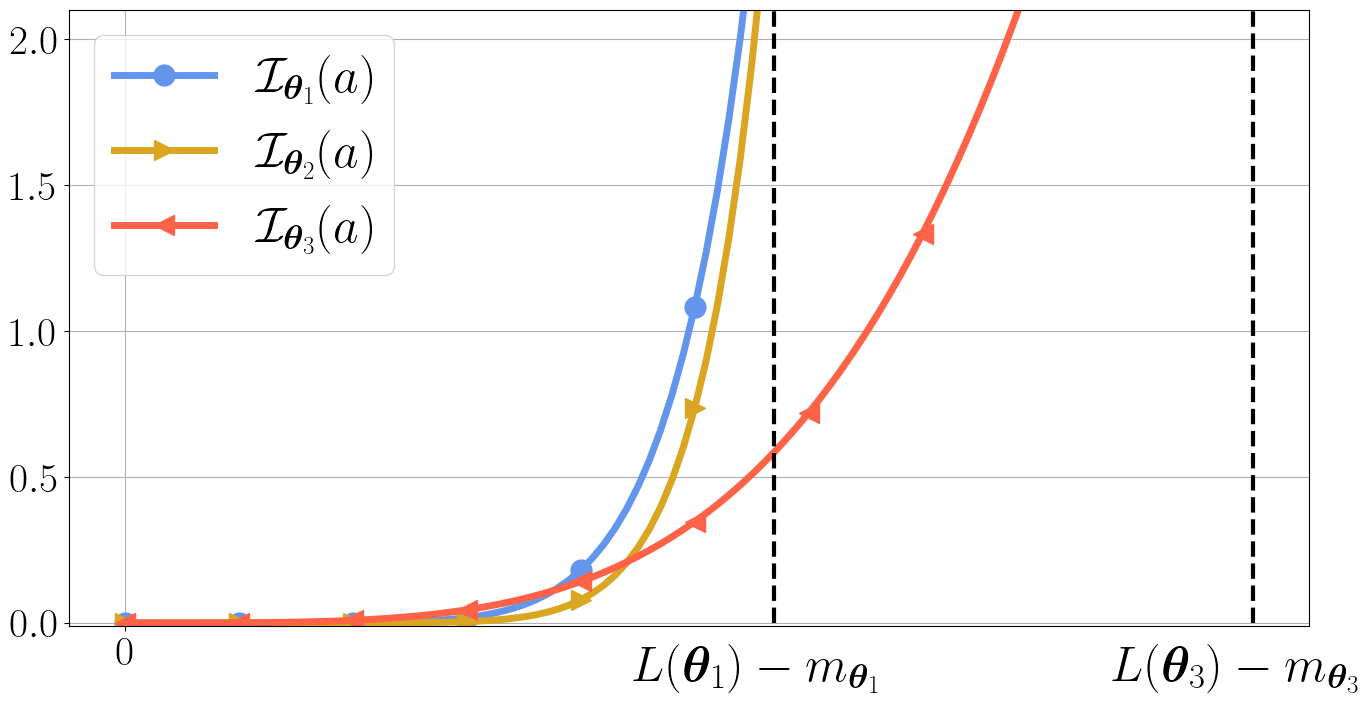

In [14]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.plot(x, model1(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}_1}(a)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=10)
plt.plot(x, model2(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}_2}(a)$", color = "goldenrod", marker = ">",  markersize=15, markevery=10)
plt.plot(x, model3(x), linewidth = 5, label = r"$\mathcal{I}_{\bm{\theta}_3}(a)$", color = "tomato", marker = "<",  markersize=15, markevery=10)
plt.vlines(1.15, 0, 2.1, color = "black", linestyles="dashed", linewidth = 3)
plt.vlines(2, 0, 2.1, color = "black", linestyles="dashed", linewidth = 3)

plt.tick_params(left = True, right = False , labelleft = True , labelbottom = True, bottom = True)

plt.annotate(r"$L(\bm{\theta}_1) - m_{\bm{\theta}_1}$", xy = (1.15, 0) , fontsize = 36, xytext = (0.9,  -0.2))

#plt.scatter(1.15, 0, color = "teal", s = 100, zorder = 3)

plt.annotate(r"$L(\bm{\theta}_3) - m_{\bm{\theta}_3}$", xy = (2, 0) , fontsize = 36, xytext = (1.75,  -0.2))

#plt.scatter(2, 0, color = "teal", s = 100, zorder = 3)

#plt.axis('off')
#plt.hlines(0, 0, 2.1, color = "black", linewidth = 5)
#plt.vlines(0, 0, 2.1, color = "black", linewidth = 5)

plt.ylim(-0.01, 2.1)
plt.xticks([0])
plt.grid(True)
plt.legend(loc = 2, fontsize=36)
plt.savefig("I_definition.pdf",format = "pdf",bbox_inches='tight')

In [15]:
model1 = lambda x: (x**(1/8))/1
model2 = lambda x: ((x*1.5)**(1/10))
model3 = lambda x: ((x*3)**(1/4))

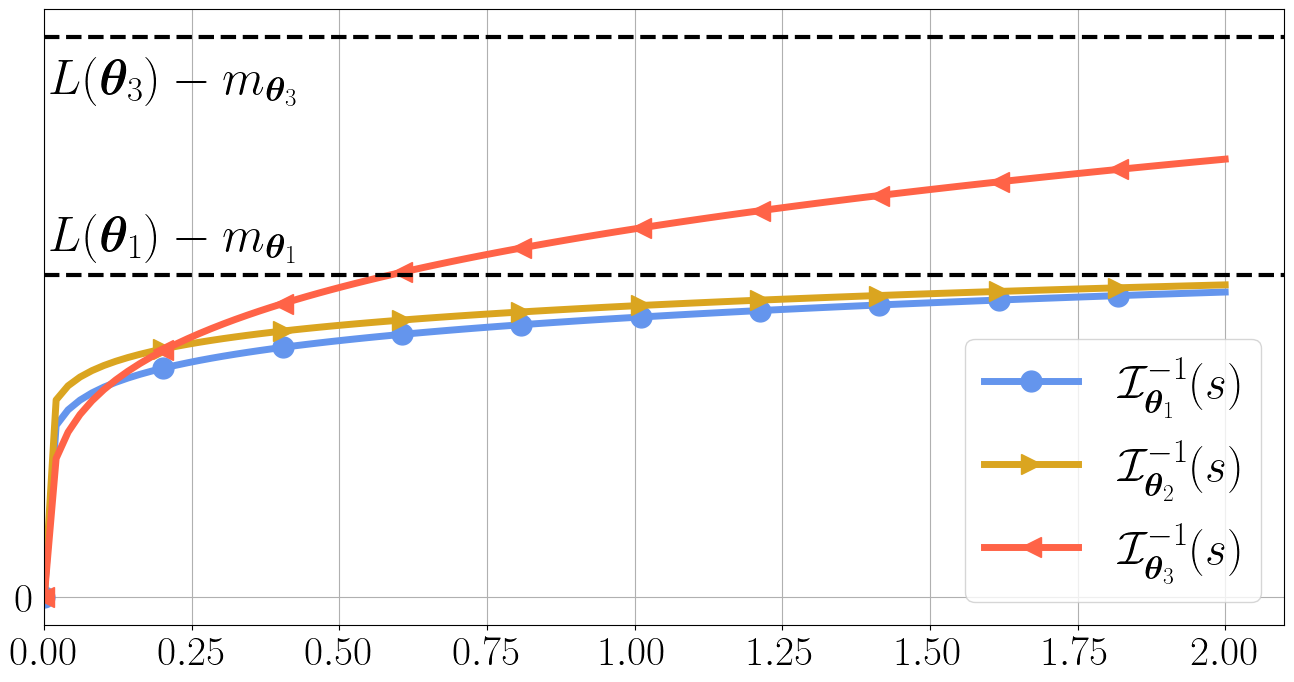

In [16]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.plot(x, model1(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}_1}(s)$", color = "cornflowerblue", marker = "o",  markersize=15, markevery=10)
plt.plot(x, model2(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}_2}(s)$", color = "goldenrod", marker = ">",  markersize=15, markevery=10)
plt.plot(x, model3(x), linewidth = 5, label = r"$\mathcal{I}^{-1}_{\bm{\theta}_3}(s)$", color = "tomato", marker = "<",  markersize=15, markevery=10)
#plt.xlim(0, 2)
plt.hlines(1.15, 0, 2.1, color = "black", linestyles="dashed", linewidth = 3)
plt.hlines(2, 0, 2.1, color = "black", linestyles="dashed", linewidth = 3)

plt.tick_params(left = False, right = False , labelleft = True , labelbottom = True, bottom = True)


plt.annotate(r"$L(\bm{\theta}_1) - m_{\bm{\theta}_1}$", xy = (0, 1.15) , fontsize = 36, xytext = (0.01, 1.24))

#plt.scatter(0, 1.15, color = "teal", s = 100, zorder = 3)

plt.annotate(r"$L(\bm{\theta}_3) - m_{\bm{\theta}_3}$", xy = (0, 2) , fontsize = 36, xytext = (0.01, 1.80))

#plt.scatter(0, 2, color = "teal", s = 100, zorder = 3)

#plt.axis('off')
#plt.vlines(0, 0, 2.1, color = "black", linewidth = 5)
#plt.hlines(0, 0, 2.1, color = "black", linewidth = 5)

plt.xlim(-0., 2.1)
plt.yticks([0])
plt.grid()
plt.legend(loc = 4, fontsize=34)

plt.savefig("Iinv_definition.pdf",format = "pdf",bbox_inches='tight')